- 1. 퍼셉트론의 개념에 대하여 설명하세요.
    * 사람의 뉴런 처럼 작동하는 하나의 구조체로써 활설함수에 의해 작동여부가 구분된다

- 2. 퍼셉트론의 기본 동작원리 및 수식을 도식화와 함깨 작성해 주세요.
    * 입력 받은 피쳐의 갯수만큼 입력층에서 입력받고 은닉층을 거쳐 출력개층에서 출력된다
    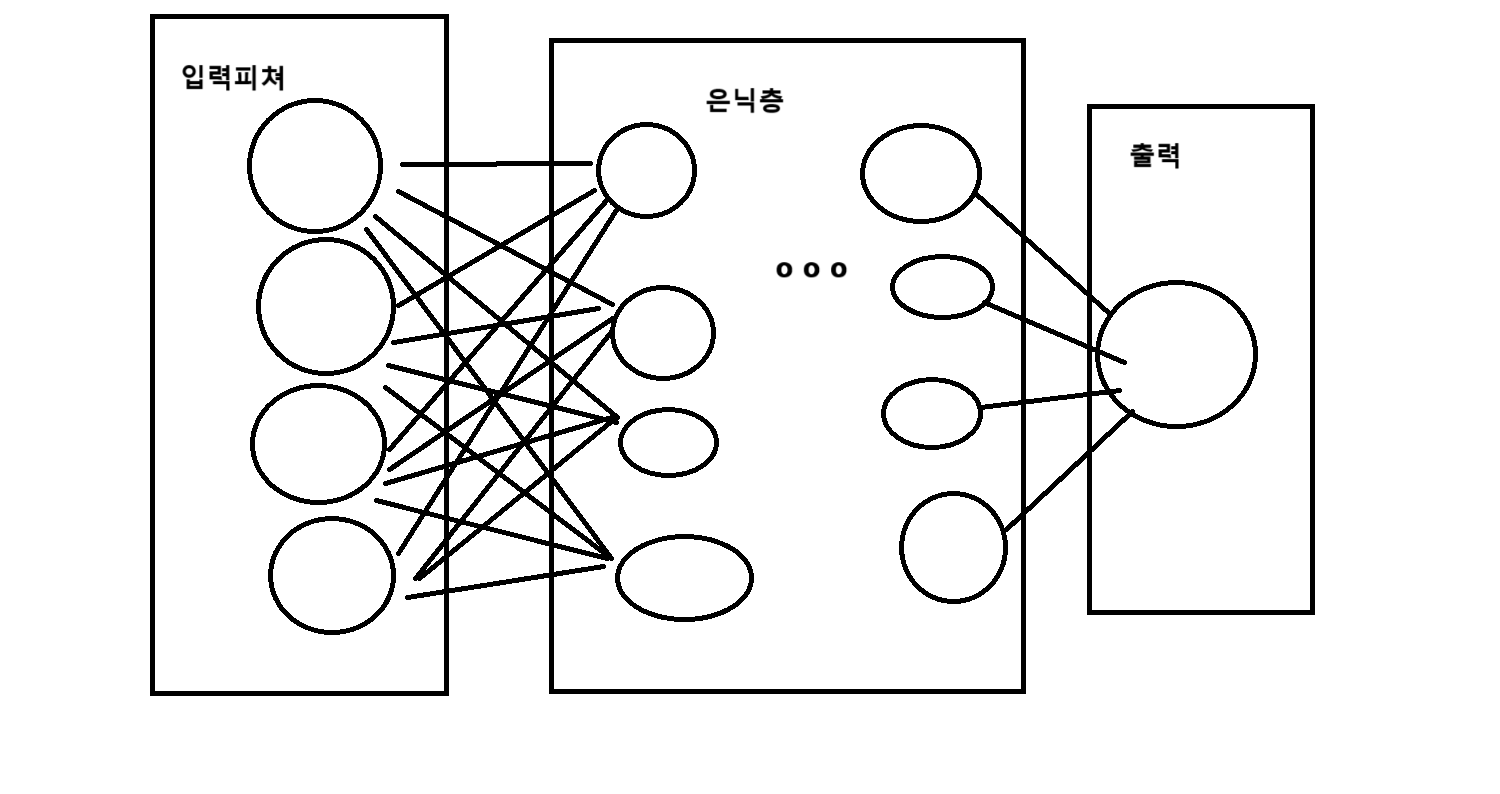

- 3. 활성화 함수의 역활에 대하여 설명하세요.
    * 입력된 값에 대한 임계값 초과 여부 검증

- 4. 대표적인 활성화 함수에 대하여 설명하세요.
    * 시그모이드 : 0을 기준으로 음의영역과 양의 영역으로 활성화여부를 판단하는 함수
    * ReLU : 0이전에는 0이상이면 원래 값을 반환하는 함수
    * leakyReLU : ReLU에서 0이하의 값이 0이던기존에서 0이하는 음수로 바뀐함수

- 5. 경사하강법의 개념 및 대표적인 경사하강법 알고리즘에 대해 간략히 설명하세요
    * 

- 6. 회귀 모델 구현을 간략하게 코드 작성하세요

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class IrisRegModel(nn.Module):
    # 모델 구조 구성 및 인스턴스 생성 메서드
    def __init__(self):
        super().__init__()
        self.in_layer=nn.Linear(3,10)
        self.hd_layer=nn.Linear(10,30)
        self.out_layer=nn.Linear(30,1)

    #순방향 학습 진행 매서드
    def forward(self,input_data):
        # 입력층 
        y=F.relu(self.in_layer(input_data))
        # 은닉층 : 10개의 숫자 값(>=0)
        y=F.relu(self.hd_layer(y))
        # 출력층 : 30개의 숫자 값(>=0) 회귀이므로 바로 반환
        return self.out_layer(y)

- 7. 이진분류 모델 구현을 간략하게 코드 작성하세요

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class IrisBCFModel(nn.Module):
    # 모델 구조 구성 및 인스턴스 생성 메서드
    def __init__(self):
        super().__init__()
        self.in_layer=nn.Linear(5,10)
        self.hd_layer1=nn.Linear(10,10)
        self.hd_layer2=nn.Linear(10,5)
        self.out_layer=nn.Linear(5,1)

    #순방향 학습 진행 매서드
    def forward(self,input_data):
        # 입력층 
        y=F.relu(self.in_layer(input_data))
        # 은닉층 : 10개의 숫자 값(>=0)
        y=F.relu(self.hd_layer1(y))
        y=F.relu(self.hd_layer2(y))
        # 출력층 : 5개의 숫자 값 => 이진분류
        return F.sigmoid(self.out_layer(y))

- 8. 다중분류 모델 구현을 간략하게 코드 작성하세요

In [4]:
# 모델이름 : DynamicModel
# 부모클레스 : nnModule
# 매개변수 : in_in,out_out,h_inout,h_cnt
class DynamicModel(nn.Module):

    # 모델 구조 설계 함수 즉, 생성자 메서드
    def __init__(self,in_in,out_out,h_inout,h_cnt):
        super().__init__()
        self.in_layer=nn.Linear(in_in,h_inout)
        self.h_layers=nn.ModuleList([nn.Linear(h_inout,h_inout)for _ in range(h_cnt)])
        self.out_layer=nn.Linear(h_inout,out_out)

    # 학습 진행 콜백 메서드
    def forward(self,x):
        # 입력층
        y=self.in_layer(x)      # y = x1w1 + x2w2 + x3w3 + b
        y=F.relu(y)             # 0 <= y
        # 은닉층
        for linear in self.h_layers:
            y=linear(y)
            y=F.relu(y)
         # 출력층 : 5개의 숫자 값 => 다중분류 : 손실함수 CrossEntropyLoss가 내부에서  softmax진행
        return F.sigmoid(self.out_layer(y))
m1=DynamicModel(3,2,5,10)


- 9. 기울기 소실 개념 및 해결 방법을 설명하세요
    * 

- 10. 파이토치의 모델 동작 모드에 대해 관련 함수도 함께 설명하세요
    * 